The script is used to evaluate the error of PCE-----Created on 2021/05/12 by Qian Wang

In [30]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
# import latex
rc("text", usetex=False)

from basic.read_data import read_specify, file_settings
from basic.utils import dist_return

In [2]:
# Import settings of PCE
from error_fixing import fix_group_ranking
input_path = file_settings()[1]
output_path = file_settings()[0]
output_path = '../output/fix-basis/'
samples, values = read_specify('model', 'reduced', 
    product_uniform=False, num_vars=11)
samples_22, _ = read_specify('model', 'full', 
    product_uniform=False, num_vars=22)

In [81]:
# Calculate the error (RMSE) of PCE
product_uniform = ['exact', 'uniform', False]
rmse_all = {}
for p in product_uniform:
    dist_type = dist_return(p)
    filename = f'adaptive-reduce-{dist_type}_552'
    approx_list_all = pickle.load(open(f'{output_path}{filename}-approx-list.pkl', "rb"))
    rmse_exact = {}

    for key, value in approx_list_all.items():
        rmse_temp = []
        if int(key.split('_')[1]) >= 100:
            for pce in value:
                if dist_type == 'full':
                    y_hat = pce(samples_22)
                else:
                    y_hat = pce(samples)
                rmse_abs = (((y_hat.flatten()-values.flatten())**2).mean())**0.5
                rmse_temp.append(rmse_abs / values.std())
            rmse_exact[key] = rmse_temp
    rmse_exact = pd.DataFrame.from_dict(rmse_exact)
    rmse_all[dist_type] = rmse_exact.mean(axis=0)

In [82]:
df = pd.DataFrame.from_dict(rmse_all)
df = df.reset_index()

<ipython-input-85-51e27a86f82e>:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(-3, 10)


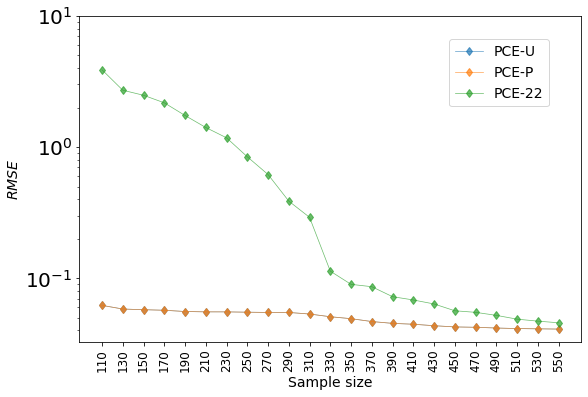

In [85]:
# Plot RMSE vs sample size
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(9, 6))
index_plot = np.array(np.arange(0, df.shape[0], 1))
xticks = [int(i.split('_')[1]) for i in df['index'].values[index_plot]]
ax1 = df.iloc[index_plot].plot(x='index', y=df.columns[1:], kind='line', marker='d',
                legend=True, logy=True, xticks=np.arange(len(xticks)), ax=axes, linewidth=0.7, alpha=0.7)

ax1.legend(['PCE-U', 'PCE-P', 'PCE-22'], bbox_to_anchor=(0.95, 0.95), fontsize=14)
ax1.set_ylabel(r'$RMSE$', fontsize = 14);
ax1.set_xlabel('Sample size', fontsize = 14);
ax1.set_ylim(-3, 10)
ax1.set_xticklabels(xticks, rotation=90, fontsize=12);
plt.savefig('../output/adaptive/figure/basis-fix.png', dpi=300, format='png')

# generate the 1-1 scatter plot

In [43]:
# Calculate the error (RMSE) of PCE
product_uniform = ['exact', 'uniform', False]
rmse_all = {}
for p in product_uniform:
    dist_type = dist_return(p)
    filename = f'adaptive-reduce-{dist_type}_552'
    approx_list_all = pickle.load(open(f'{output_path}{filename}-approx-list.pkl', "rb"))
    
    for key, value in approx_list_all.items():
        if int(key.split('_')[1]) in [150, 250, 350, 550]:
            rmse_exact = {}
            for ii in range(len(value)):
                pce = value[ii]
                if dist_type == 'full':
                    y_hat = pce(samples_22)
                else:
                    y_hat = pce(samples)
                
                rmse_exact[ii] = y_hat.flatten()
                
            rmse_all[f'{dist_type}{key}'] = pd.DataFrame.from_dict(rmse_exact).mean(axis=1).values

In [44]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
# import latex
rc("text", usetex=False)

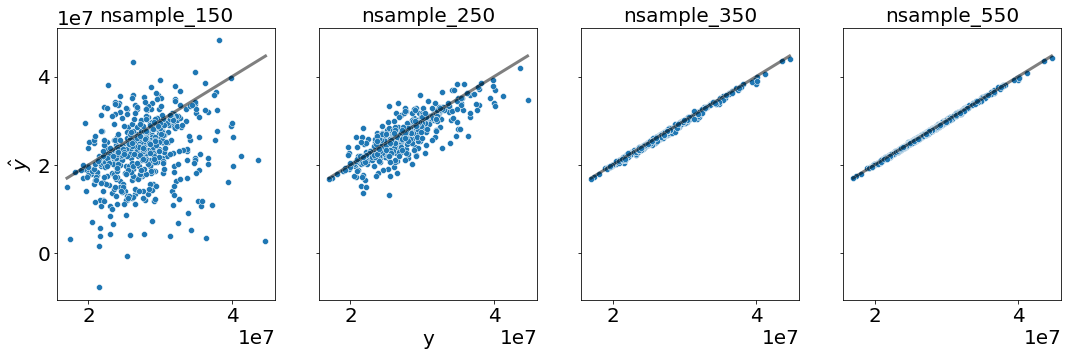

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(18,5))
k = 0; dist_type = 'full' 
for key, y_hat in rmse_all.items():
    if dist_type in key:
        sns.scatterplot(x=values.flatten(), y = y_hat, ax=axes[k])
        sns.lineplot(x=values.flatten(), y=values.flatten(), ax=axes[k], color='k', alpha=0.5)
        axes[k].set_title(key[4:])
        k += 1
axes[1].set_xlabel('y')
axes[0].set_ylabel(r'$\hat y$')
plt.savefig(f'../output/adaptive/figure/pce_scatter_{dist_type}_data.png', dpi=300, format='png')